In [33]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdullahcetin/mirichoi0218insurance")

print("Path to dataset files:", path)

Path to dataset files: /home/jordi/.cache/kagglehub/datasets/abdullahcetin/mirichoi0218insurance/versions/1


In [34]:
import pandas as pd

df = pd.read_csv(path + "/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [36]:
df.shape # Filas por columnas del df

(1338, 7)

<Axes: >

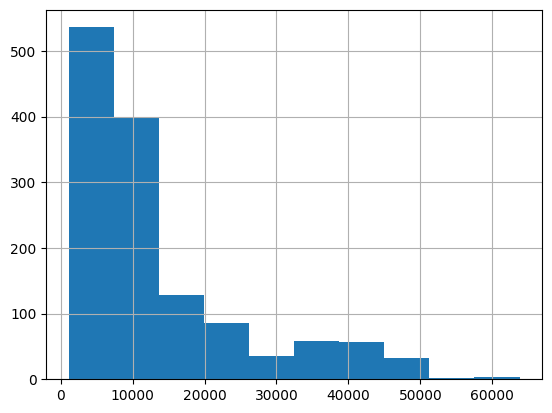

In [37]:
# Análisis variable objetivo
df.charges.hist()

In [38]:
df[df.charges > 50000].shape


(7, 7)

In [39]:
df = df[df.charges < 50000]
df.shape

(1331, 7)

<Axes: >

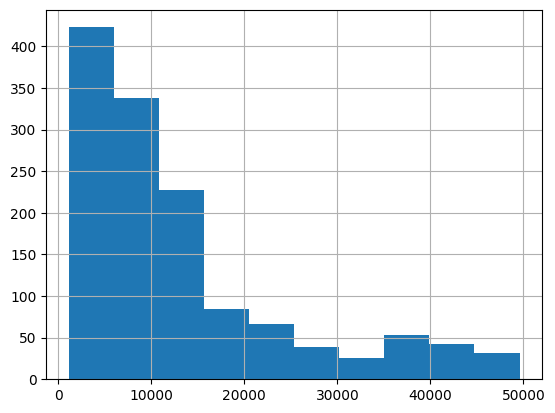

In [40]:
df.charges.hist()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

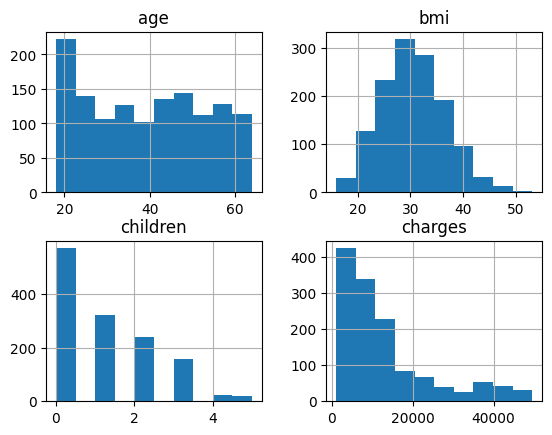

In [41]:
# Histogramas de distribución
df.hist()

In [42]:
# One-hot encoding para sexo
dummies_sex = pd.get_dummies(df.sex, dtype=int)
dummies_sex

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [43]:
df = df.join(dummies_sex)

In [44]:
# One-hot encoding para region
dummies_region = pd.get_dummies(df.region, dtype=int)
dummies_region

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [45]:
df = df.join(dummies_region)

In [46]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

In [47]:
df['smoker'] 

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1331, dtype: int64

In [48]:
# Retiramos columnas categóricas originales
df = df.drop('sex', axis=1)
df = df.drop('region', axis=1)
df



,age,bmi,children,smoker,charges,female,male,northeast,northwest,southeast,southwest
0,19,27.900,0,1,16884.92400,1,0,0,0,0,1
1,18,33.770,1,0,1725.55230,0,1,0,0,1,0
2,28,33.000,3,0,4449.46200,0,1,0,0,1,0
3,33,22.705,0,0,21984.47061,0,1,0,1,0,0
4,32,28.880,0,0,3866.85520,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,0,1,0,1,0,0
1334,18,31.920,0,0,2205.98080,1,0,1,0,0,0
1335,18,36.850,0,0,1629.83350,1,0,0,0,1,0
1336,21,25.800,0,0,2007.94500,1,0,0,0,0,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1331 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1331 non-null   int64  
 1   bmi        1331 non-null   float64
 2   children   1331 non-null   int64  
 3   smoker     1331 non-null   int64  
 4   charges    1331 non-null   float64
 5   female     1331 non-null   int64  
 6   male       1331 non-null   int64  
 7   northeast  1331 non-null   int64  
 8   northwest  1331 non-null   int64  
 9   southeast  1331 non-null   int64  
 10  southwest  1331 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 124.8 KB


In [50]:
df.shape

(1331, 11)

In [51]:
# Entrenamiento del modelo

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [52]:
df.columns

Index(['age', 'bmi', 'children', 'smoker', 'charges', 'female', 'male',
       'northeast', 'northwest', 'southeast', 'southwest'],
      dtype='object')

In [53]:
X_cols = list(set(df.columns) - set(['charges']))
X_cols

['male',
 'female',
 'northwest',
 'southwest',
 'southeast',
 'age',
 'smoker',
 'northeast',
 'children',
 'bmi']

In [54]:
y_cols = ['charges']
y_cols

['charges']

In [55]:
df.head()

,age,bmi,children,smoker,charges,female,male,northeast,northwest,southeast,southwest
0,19,27.900,0,1,16884.92400,1,0,0,0,0,1
1,18,33.770,1,0,1725.55230,0,1,0,0,1,0
2,28,33.000,3,0,4449.46200,0,1,0,0,1,0
3,33,22.705,0,0,21984.47061,0,1,0,1,0,0
4,32,28.880,0,0,3866.85520,0,1,0,1,0,0


In [56]:
X = df[X_cols].values
y = df[y_cols].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

sc_x = StandardScaler()
sc_y = StandardScaler()

sc_x = sc_x.fit(X)
sc_y = sc_y.fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)


y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [57]:
X_test.shape


(333, 10)

In [58]:
y_pred.shape

(333, 1)

In [59]:
y_test

array([[-8.69575623e-01],
       [ 2.32112464e+00],
       [ 2.44761976e+00],
       [-1.91487496e-01],
       [ 1.15086571e-01],
       [-5.54230438e-01],
       [-1.02266289e-01],
       [ 5.73974181e-01],
       [ 2.11996782e+00],
       [-8.93626055e-01],
       [-6.64299365e-01],
       [-6.52913067e-01],
       [-6.26561222e-01],
       [ 4.89877481e-01],
       [-3.14276188e-01],
       [-8.71658472e-01],
       [ 6.08036622e-02],
       [-5.03055974e-01],
       [-9.25667186e-01],
       [-9.26299493e-01],
       [ 1.77114826e+00],
       [-2.27046176e-01],
       [-1.44614092e-01],
       [-5.17425145e-01],
       [-3.49950661e-01],
       [ 9.37379561e-02],
       [-6.54404692e-01],
       [ 6.56029750e-01],
       [-1.17884977e-01],
       [-6.03425914e-01],
       [ 7.10397282e-01],
       [-7.34274451e-01],
       [ 8.59017538e-01],
       [-7.35232009e-01],
       [-7.84574078e-01],
       [-3.78916427e-01],
       [-8.89595145e-01],
       [-4.01357944e-01],
       [ 8.7

In [60]:
print(
    sc_y.inverse_transform(y_pred)
)

[[ 3878.45402663]
 [33072.23842926]
 [33799.65212225]
 [12375.78688553]
 [13438.99794596]
 [ 7665.02744429]
 [12306.75322652]
 [11067.02975488]
 [30387.75417053]
 [ 1098.19191882]
 [ 5742.82877807]
 [ 9902.15957806]
 [10727.78713118]
 [28020.88222365]
 [ 9013.91412677]
 [ 1811.62748189]
 [23213.29944288]
 [ 8062.78518751]
 [ 4391.39115457]
 [ 2784.3040717 ]
 [25902.18328867]
 [13464.73114423]
 [ 9879.22219811]
 [ 7209.96180234]
 [14886.43069264]
 [ 4124.49950219]
 [ 5954.93676729]
 [15972.96392522]
 [12171.98992315]
 [ 8971.51947031]
 [ 2726.90810445]
 [ 6905.24888525]
 [ 2674.75806893]
 [ 6258.08343229]
 [ 2293.6038885 ]
 [ 7514.73428873]
 [ 3382.26776928]
 [13433.95838807]
 [32239.76235111]
 [ 8412.92082087]
 [25619.18884884]
 [ 3371.79101465]
 [ 5350.20907082]
 [29164.03811028]
 [13448.04321526]
 [28948.26296888]
 [ -628.99872392]
 [ 7440.85014144]
 [28445.02451523]
 [ 6766.65188414]
 [ 3849.12199496]
 [13645.5670458 ]
 [14493.95847758]
 [11103.0513935 ]
 [11901.50414229]
 [29492.76

In [61]:
print(
    sc_y.inverse_transform(y_test)
)

[[ 2867.1196  ]
 [40182.246   ]
 [41661.602   ]
 [10797.3362  ]
 [14382.70905 ]
 [ 6555.07035 ]
 [11840.77505 ]
 [19749.38338 ]
 [37829.7242  ]
 [ 2585.85065 ]
 [ 5267.81815 ]
 [ 5400.9805  ]
 [ 5709.1644  ]
 [18765.87545 ]
 [ 9361.3268  ]
 [ 2842.76075 ]
 [13747.87235 ]
 [ 7153.5539  ]
 [ 2211.13075 ]
 [ 2203.73595 ]
 [33750.2918  ]
 [10381.4787  ]
 [11345.519   ]
 [ 6985.50695 ]
 [ 8944.1151  ]
 [14133.03775 ]
 [ 5383.536   ]
 [20709.02034 ]
 [11658.11505 ]
 [ 5979.731   ]
 [21344.8467  ]
 [ 4449.462   ]
 [23082.95533 ]
 [ 4438.2634  ]
 [ 3861.20965 ]
 [ 8605.3615  ]
 [ 2632.992   ]
 [ 8342.90875 ]
 [23244.7902  ]
 [ 6746.7425  ]
 [18223.4512  ]
 [ 3279.86855 ]
 [ 5708.867   ]
 [20009.63365 ]
 [13390.559   ]
 [35491.64    ]
 [ 1625.43375 ]
 [ 6311.952   ]
 [19199.944   ]
 [ 7228.21565 ]
 [ 3070.8087  ]
 [11879.10405 ]
 [11090.7178  ]
 [ 8765.249   ]
 [14449.8544  ]
 [37079.372   ]
 [ 4433.9159  ]
 [21223.6758  ]
 [12268.63225 ]
 [11353.2276  ]
 [11015.1747  ]
 [ 2498.4144  ]
 [11396.

In [62]:
y_pred

array([[-7.83099565e-01],
       [ 1.71317003e+00],
       [ 1.77536891e+00],
       [-5.65190932e-02],
       [ 3.43927737e-02],
       [-4.59321464e-01],
       [-6.24219464e-02],
       [-1.68426840e-01],
       [ 1.48362814e+00],
       [-1.02083112e+00],
       [-6.23682686e-01],
       [-2.68031261e-01],
       [-1.97434420e-01],
       [ 1.28124429e+00],
       [-3.43982364e-01],
       [-9.59827467e-01],
       [ 8.70162857e-01],
       [-4.25310438e-01],
       [-7.39239909e-01],
       [-8.76656920e-01],
       [ 1.10008094e+00],
       [ 3.65931394e-02],
       [-2.69992565e-01],
       [-4.98232710e-01],
       [ 1.58158241e-01],
       [-7.62060983e-01],
       [-6.05545992e-01],
       [ 2.51064314e-01],
       [-7.39451368e-02],
       [-3.47607399e-01],
       [-8.81564671e-01],
       [-5.24287762e-01],
       [-8.86023858e-01],
       [-5.79624865e-01],
       [-9.18615165e-01],
       [-4.72172563e-01],
       [-8.25526907e-01],
       [ 3.39618568e-02],
       [ 1.6

In [65]:
import sklearn.metrics as metrics

mse = metrics.mean_squared_error(y_test, y_pred)

r2 = metrics.r2_score(y_test, y_pred)

print('r2: ', r2.__round__(4))
print('mse: ', mse.__round__(4))

r2:  0.7404
mse:  0.2715


In [72]:
from regressors import stats

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

y_test = y_test.reshape(-1)
print('Resultados:')
stats.summary(model, X_test, y_test, X_cols)

Resultados:
Residuals:
    Min     1Q  Median     3Q    Max
-1.8927 -0.134  0.0666 0.2139 0.9136


Coefficients:
            Estimate                                      Std. Error           t value   p value
_intercept -0.009870  2.883900e-02+0.000000e+                    00j  -0.3422+ 0.0000j  0.732394
male        0.000224  1.584007e+03+7.856562e+                    06j   0.0000- 0.0000j  1.000000
female     -0.000224  2.430083e+03+7.843232e+                    06j  -0.0000+ 0.0000j  1.000000
northwest   0.002005  2.443851e+05+1.551089e+                    04j   0.0000- 0.0000j  1.000000
southwest  -0.017246  2.443851e+05+1.551089e+                    04j  -0.0000+ 0.0000j  1.000000
southeast  -0.011963  2.632958e+05+1.671113e+                    04j  -0.0000+ 0.0000j  1.000000
age         0.313184  2.851800e-02+0.000000e+                    00j  10.9821- 0.0000j  0.000000
smoker      0.789559  2.856100e-02+0.000000e+                    00j  27.6444- 0.0000j  0.000000
northeast   0.

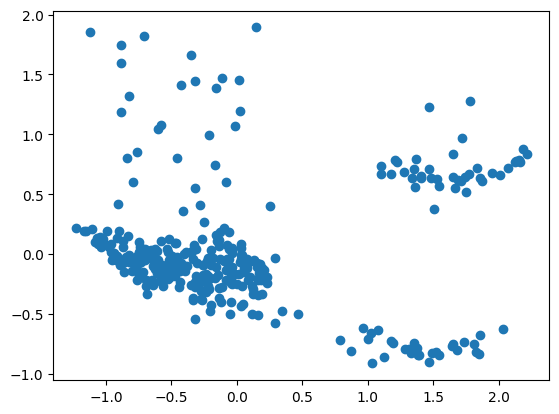

In [74]:
import numpy as np
import matplotlib.pyplot as plt

residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()